<a href="https://colab.research.google.com/github/vladijarosz/VJaroszewski-econ/blob/main/Inflacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
!wget -inflacion.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/inflacion.xlsx"

import pandas as pd
df = pd.read_excel("inflacion.xlsx")




--2026-02-04 03:40:57--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/inflacion.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/inflacion.xlsx [following]
--2026-02-04 03:40:57--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/inflacion.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12282 (12K) [application/octet-stream]
Saving to: ‘inflacion.xlsx.15’

inflacion.xlsx.15   100%[===================>]  11.99K  --.-KB/s    in 0s      

2026-02-04 03:40:57 (72.2 MB/s)

In [ ]:
df = df.rename(columns={df.columns[0]: "fecha"})
df = df.rename(columns={df.columns[1]: "IPC"})
df.set_index("fecha", inplace=True)
df.index = pd.to_datetime(df.index)

df

,IPC
fecha,
2017-01-31,1.6
2017-02-28,2.1
2017-03-31,2.4
2017-04-30,2.7
2017-05-31,1.4
...,...
2025-06-30,1.6
2025-07-31,1.9
2025-08-31,1.9


In [ ]:
inflacion_2024=df.loc["2023-01-01":"2024-12-31"]
inflacion_2024

,IPC
fecha,
2023-01-31,6.0
2023-02-28,6.6
2023-03-31,7.7
2023-04-30,8.4
2023-05-31,7.8
2023-06-30,6.0
2023-07-31,6.3
2023-08-31,12.4
2023-09-30,12.7


In [ ]:
inflacion_2024['IPC_indice'] = (1 + inflacion_2024['IPC'] / 100).cumprod() * 100

# Ordenamos en orden ascendente para calcular bien el acumulado
inflacion_2024 = inflacion_2024.sort_index(ascending=False)

# Calculamos el índice acumulado del IPC (asumiendo que IPC es inflación mensual en %)
inflacion_2024['factor'] = (1 + inflacion_2024['IPC'].shift(1)/100).cumprod()

# Si quieres el deflactor relativo al último mes (más reciente), normalizas
inflacion_2024['deflactor'] = 100
inflacion_2024['deflactor'] = inflacion_2024['deflactor'].iloc[-1] / inflacion_2024['factor']



inflacion_2024

/tmp/ipython-input-290837856.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IPC,IPC_indice,factor,deflactor
fecha,,,,
2024-12-31,2.7,677.430459,NaN,NaN
2024-11-30,2.4,659.620700,1.027000,97.370983
2024-10-31,2.7,644.160840,1.051648,95.088851
2024-09-30,3.5,627.225745,1.080042,92.588949
2024-08-31,4.2,606.015212,1.117844,89.457922
2024-07-31,4.0,581.588495,1.164793,85.852133
2024-06-30,4.6,559.219707,1.211385,82.550127
2024-05-31,4.2,534.626871,1.267109,78.919816
2024-04-30,8.8,513.077611,1.320327,75.738787


In [ ]:
inflacion_2024['deflactor'].iloc[0]=100



/tmp/ipython-input-3700354909.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




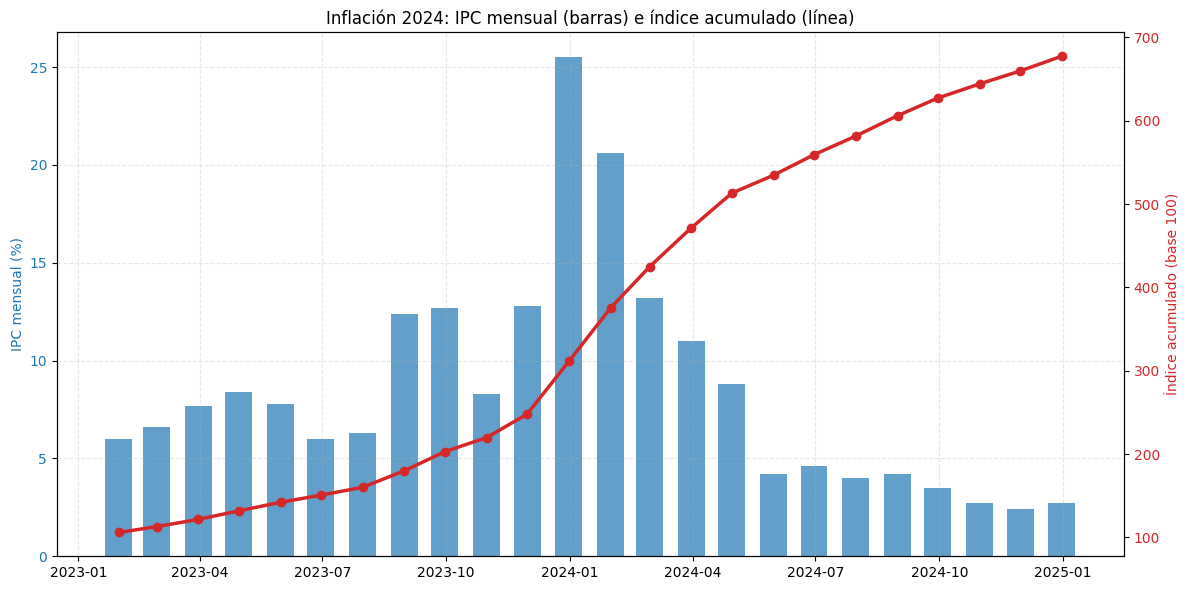

In [ ]:
import matplotlib.pyplot as plt

# Asegurar índice datetime
inflacion_2024.index = pd.to_datetime(inflacion_2024.index)

fig, ax1 = plt.subplots(figsize=(12,6))

# --- EJE IZQUIERDO: barras IPC ---
ax1.bar(
    inflacion_2024.index,
    inflacion_2024['IPC'],
    width=20,
    alpha=0.7,
    color='tab:blue',
    label='IPC mensual (%)'
)
ax1.set_ylabel('IPC mensual (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- EJE DERECHO: línea índice acumulado ---
ax2 = ax1.twinx()
ax2.plot(
    inflacion_2024.index,
    inflacion_2024['IPC_indice'],
    color='tab:red',
    linewidth=2.5,
    marker='o',
    label='IPC índice (base 100, ene 2024)'
)
ax2.set_ylabel('Índice acumulado (base 100)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título y grid
plt.title('Inflación 2024: IPC mensual (barras) e índice acumulado (línea)')
ax1.grid(True, linestyle='--', alpha=0.3)

fig.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# --- Barras IPC mensual ---
fig.add_trace(
    go.Bar(
        x=inflacion_2024.index,
        y=inflacion_2024['IPC'],
        name='IPC mensual (%)',
        marker_color='steelblue',
        opacity=0.75,
        yaxis='y1'
    )
)

# --- Línea IPC índice ---
fig.add_trace(
    go.Scatter(
        x=inflacion_2024.index,
        y=inflacion_2024['IPC_indice'],
        name='IPC índice (base 100)',
        mode='lines+markers',
        line=dict(width=3, color='crimson'),
        marker=dict(size=8),
        yaxis='y2'
    )
)

# --- Configuración de ejes ---
fig.update_layout(
    title='Inflación 2024: IPC mensual y índice acumulado',
    xaxis=dict(title='Fecha'),

    yaxis=dict(
        title='IPC mensual (%)',
        side='left',
        showgrid=True
    ),

    yaxis2=dict(
        title='Índice acumulado (base 100)',
        overlaying='y',
        side='right'
    ),

    bargap=0.2,
    template='plotly_white',
    legend=dict(orientation='h', y=-0.2)
)

fig.show()


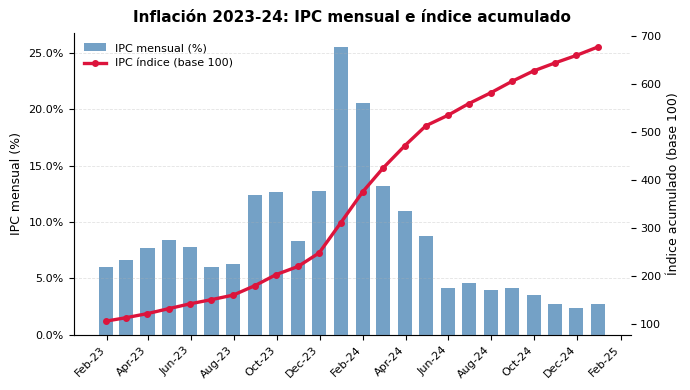

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Asegurar orden temporal
inflacion_2024 = inflacion_2024.sort_index()

fig, ax1 = plt.subplots(figsize=(7, 4))  # tamaño chico para informe

# =========================
# Barras: IPC mensual
# =========================
ax1.bar(
    inflacion_2024.index,
    inflacion_2024['IPC'],
    width=20,
    color='steelblue',
    alpha=0.75,
    label='IPC mensual (%)'
)

ax1.set_ylabel('IPC mensual (%)', fontsize=9)
ax1.tick_params(axis='y', labelsize=8)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# Grid solo horizontal (macro-style)
ax1.grid(
    axis='y',
    linestyle='--',
    linewidth=0.6,
    alpha=0.35
)
ax1.grid(axis='x', visible=False)

# =========================
# Línea: IPC índice acumulado
# =========================
ax2 = ax1.twinx()

ax2.plot(
    inflacion_2024.index,
    inflacion_2024['IPC_indice'],
    color='crimson',
    linewidth=2.4,
    marker='o',
    markersize=4,
    label='IPC índice (base 100)'
)

ax2.set_ylabel('Índice acumulado (base 100)', fontsize=9)
ax2.tick_params(axis='y', labelsize=8)

# =========================
# Eje X (clave en tamaño chico)
# =========================
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=8)

# =========================
# Título
# =========================
ax1.set_title(
    'Inflación 2023-24: IPC mensual e índice acumulado',
    fontsize=11,
    weight='bold',
    pad=8
)

# =========================
# Leyenda combinada
# =========================
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    frameon=False,
    fontsize=8,
    loc='upper left'
)

# =========================
# Limpieza visual
# =========================
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

ax1.spines['left'].set_color('#b0b0b0')
ax1.spines['bottom'].set_color('#b0b0b0')

plt.tight_layout()
plt.show()


In [ ]:
!wget -O dolar_oficial.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/dolar_oficial.xlsx"

import pandas as pd
df_oficial = pd.read_excel("dolar_oficial.xlsx")
df_oficial['Venta'] = (
    df_oficial['Venta']
    .astype(str)                     # 1) unificar tipo
    .str.replace('.', '', regex=False)   # 2) quitar miles
    .str.replace(',', '.', regex=False)  # 3) normalizar decimal
)

df_oficial['Venta'] = pd.to_numeric(df_oficial['Venta'], errors='coerce')  # 4) volver a número

df_oficial.sort_values('Fecha', inplace=True)
df_oficial

--2026-02-04 03:40:58--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/dolar_oficial.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/dolar_oficial.xlsx [following]
--2026-02-04 03:40:58--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/dolar_oficial.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144398 (141K) [application/octet-stream]
Saving to: ‘dolar_oficial.xlsx’

dolar_oficial.xlsx  100%[===================>] 141.01K  --.-KB/s    in 0.02s   

2026-02-04 03:40

,Fecha,Compra,Venta
5971,2002-04-09,"2,70",2.85
5970,2002-04-10,"2,70",2.84
5969,2002-04-11,"2,69",2.90
5968,2002-04-12,"2,83",3.05
5967,2002-04-15,"2,90",3.05
...,...,...,...
4,2026-01-28,"1413,25",1463.92
3,2026-01-29,"1414,63",1465.08
2,2026-01-30,"1414,11",1465.01
1,2026-01-31,"1414,11",1465.01


In [ ]:
!wget -O MEP.csv "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/MEP.csv"

import pandas as pd
df_mep = pd.read_csv("MEP.csv")
df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])
df_mep['mep'] = pd.to_numeric(df_mep['ultimo'], errors='coerce')
df_mep.sort_values('fecha', inplace=True)

--2026-02-04 03:40:58--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/MEP.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/MEP.csv [following]
--2026-02-04 03:40:59--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/MEP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149475 (146K) [text/plain]
Saving to: ‘MEP.csv’

MEP.csv             100%[===================>] 145.97K  --.-KB/s    in 0.02s   

2026-02-04 03:40:59 (5.76 MB/s) - ‘MEP.csv’ saved [149475/149475]



In [ ]:
df_mep

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,especie,ultimo,variacion,anterior,apertura,minimo,maximo,varMTD,varYTD,var6M,var12M,fecha,hora,cierre,timestamp,volumen,mep
0,DOLAR MEP,36.97,NaN,NaN,36.97,36.97,36.97,NaN,NaN,NaN,NaN,2018-10-29,NaN,36.97,1540782000,0,36.97
1,DOLAR MEP,36.63,0.0,0.00,36.63,36.63,36.63,NaN,NaN,NaN,NaN,2018-10-30,19:59,36.63,1540868400,0,36.63
2,DOLAR MEP,35.93,0.0,0.00,35.93,35.93,35.93,NaN,NaN,NaN,NaN,2018-10-31,19:59,35.93,1540954800,0,35.93
3,DOLAR MEP,35.89,0.0,0.00,35.89,35.89,35.89,NaN,NaN,NaN,NaN,2018-11-01,19:59,35.89,1541041200,0,35.89
4,DOLAR MEP,35.66,0.0,0.00,35.66,35.66,35.66,NaN,NaN,NaN,NaN,2018-11-02,19:59,35.66,1541127600,0,35.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,DOLAR MEP,1164.72,0.0,1164.37,1164.37,1160.92,1175.61,NaN,NaN,NaN,NaN,2025-01-08,19:59,1164.72,1736305200,0,1164.72
1738,DOLAR MEP,1164.19,-0.0,1164.72,1164.72,1159.62,1170.42,NaN,NaN,NaN,NaN,2025-01-09,19:59,1164.19,1736391600,0,1164.19
1739,DOLAR MEP,1164.01,-0.0,1164.19,1164.19,1161.07,1174.36,NaN,NaN,NaN,NaN,2025-01-10,19:59,1164.01,1736478000,0,1164.01
1740,DOLAR MEP,1163.21,-0.1,1164.01,1164.01,1161.30,1175.23,NaN,NaN,NaN,NaN,2025-01-13,19:59,1163.21,1736737200,0,1163.21


In [ ]:
import plotly.graph_objects as go
import pandas as pd


fig = go.Figure()

# Línea dólar MEP
fig.add_trace(
    go.Scatter(
        x=df_mep['fecha'],
        y=df_mep['mep'],
        mode='lines',
        name='Dólar MEP',
        line=dict(color='green', width=2)
    )
)


# Layout con selector temporal
fig.update_layout(
    title='Evolución del dólar MEP y oficial',
    xaxis_title='Fecha',
    yaxis_title='Precio (ARS)',
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all", label="Todo")
            ]
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


In [ ]:
df_mep['fecha']=pd.to_datetime(df_mep['fecha'])
df_mep.set_index('fecha', inplace=True)
mep=df_mep['ultimo']
mep=mep.loc["2023-01-01":"2024-12-31"]


In [ ]:
df_oficial.set_index('Fecha', inplace=True)
oficial=df_oficial['Venta']
oficial=oficial.loc["2023-01-01":"2024-12-31"]
divisas=pd.merge(mep, oficial, left_index=True, right_index=True)
divisas.columns=['ultimo','venta']
divisas=divisas.rename(columns={'ultimo':'mep',
                                'venta':'oficial'})

In [ ]:

import plotly.graph_objects as go
import pandas as pd


fig = go.Figure()

# Línea dólar MEP
fig.add_trace(
    go.Scatter(
        x=divisas.index,
        y=divisas['mep'],
        mode='lines',
        name='Dólar MEP',
        line=dict(color='green', width=2)
    )
)

# Línea dólar MEP
fig.add_trace(
    go.Scatter(
        x=divisas.index,
        y=divisas['oficial'],
        mode='lines',
        name='Dólar Oficial',
        line=dict(color='blue', width=2)
    )
)


# Layout con selector temporal
fig.update_layout(
    title='Evolución del dólar MEP y oficial',
    xaxis_title='Fecha',
    yaxis_title='Precio (ARS)',
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all", label="Todo")
            ]
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

In [ ]:
divisas = divisas.sort_index(ascending=False)

In [ ]:
divisas

,mep,oficial
2024-12-30,1170.41,1060.28
2024-12-27,1170.56,1057.97
2024-12-26,1170.89,1055.82
2024-12-23,1162.30,1055.07
2024-12-20,1142.20,1054.27
...,...,...
2023-01-06,329.91,186.61
2023-01-05,332.67,186.25
2023-01-04,334.93,186.22
2023-01-03,330.70,185.99


In [ ]:

# Create the 'mes' column as the first day of each month
divisas['mes'] = divisas.index.to_period('M').to_timestamp()


In [ ]:
inflacion_2024

,IPC,IPC_indice,factor,deflactor
fecha,,,,
2023-01-31,6.0,106.000000,6.390853,15.647363
2023-02-28,6.6,112.996000,5.995172,16.680088
2023-03-31,7.7,121.696692,5.566548,17.964455
2023-04-30,8.4,131.919214,5.135192,19.473470
2023-05-31,7.8,142.208913,4.763629,20.992400
2023-06-30,6.0,150.741448,4.493989,22.251944
2023-07-31,6.3,160.238159,4.227648,23.653817
2023-08-31,12.4,180.107690,3.761252,26.586890
2023-09-30,12.7,202.981367,3.337402,29.963425


In [ ]:
inflacion_2024['mes'] = inflacion_2024.index.to_period('M').to_timestamp()

# Hacer merge por mes
df = pd.merge(
    inflacion_2024[['mes', 'deflactor']], divisas[['mes','mep','oficial']], on='mes', how='left'
)
df['fecha']=divisas.index

df['mep_deflac']=df['mep']/(df['deflactor'])*100
df['oficial_deflac']=df['oficial']/(df['deflactor'])*100
df


,mes,deflactor,mep,oficial,fecha,mep_deflac,oficial_deflac
0,2023-01-01,15.647363,354.81,194.36,2024-12-30,2267.538690,1242.126264
1,2023-01-01,15.647363,353.93,194.07,2024-12-27,2261.914739,1240.272917
2,2023-01-01,15.647363,352.78,193.06,2024-12-26,2254.565257,1233.818155
3,2023-01-01,15.647363,352.78,192.74,2024-12-23,2254.565257,1231.773082
4,2023-01-01,15.647363,352.22,192.74,2024-12-20,2250.986379,1231.773082
...,...,...,...,...,...,...,...
538,2024-12-01,100.000000,1062.16,1043.33,2023-01-06,1062.160000,1043.330000
539,2024-12-01,100.000000,1076.34,1042.35,2023-01-05,1076.340000,1042.350000
540,2024-12-01,100.000000,1075.65,1042.35,2023-01-04,1075.650000,1042.350000
541,2024-12-01,100.000000,1075.65,1042.17,2023-01-03,1075.650000,1042.170000


In [ ]:
import plotly.express as px

fig = px.line(
    df,
    x='fecha',
    y=['mep_deflac', 'oficial_deflac'],
    title='Dólar a precios constantes (deflactado)',
    labels={
        'fecha': 'Fecha',
        'value': 'Índice real (base 100)',
        'variable': 'Tipo de dólar'
    }
)

fig.update_layout(
    template='plotly_white',
    hovermode='x unified'
)

fig.update_traces(line=dict(width=3))

fig.show()


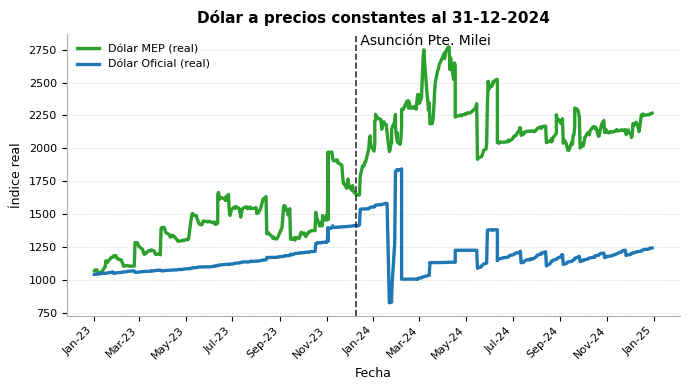

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Asegurar orden temporal
df = df.sort_values('fecha')

# Fecha del evento
fecha_milei = pd.to_datetime("2023-12-10")

fig, ax = plt.subplots(figsize=(7, 4))

# -----------------------
# Series deflactadas
# -----------------------
ax.plot(
    df['fecha'],
    df['mep_deflac'],
    label='Dólar MEP (real)',
    linewidth=2.4,
    color='#2ca02c'
)

ax.plot(
    df['fecha'],
    df['oficial_deflac'],
    label='Dólar Oficial (real)',
    linewidth=2.4,
    color='#1f77b4'
)

# -----------------------
# Línea evento político
# -----------------------
ax.axvline(
    fecha_milei,
    color='black',
    linestyle='--',
    linewidth=1.2,
    alpha=0.8
)

ax.text(
    fecha_milei,
    ax.get_ylim()[1] ,
    ' Asunción Pte. Milei',
    va='top',
    ha='left',
    fontsize=10,
    color='black'
)

# -----------------------
# Estética informe
# -----------------------
ax.set_title(
    'Dólar a precios constantes al 31-12-2024',
    fontsize=11,
    weight='bold',
    pad=8
)

ax.set_ylabel('Índice real', fontsize=9)
ax.set_xlabel('Fecha', fontsize=9)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)

ax.tick_params(axis='y', labelsize=8)

ax.grid(
    axis='y',
    linestyle='--',
    linewidth=0.6,
    alpha=0.35
)
ax.grid(axis='x', visible=False)

ax.legend(
    frameon=False,
    fontsize=8,
    loc='upper left'
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#b0b0b0')
ax.spines['bottom'].set_color('#b0b0b0')

plt.tight_layout()
plt.show()


In [ ]:
# Descargar y resetear el índice enseguida
syp = yf.download("SPY.BA", start="2023-01-01", end="2025-01-01", progress=False).reset_index()
merval = yf.download("^MERV", start="2023-01-01", end="2025-01-01", progress=False).reset_index()
syp.columns = syp.columns.get_level_values(0)
merval.columns = merval.columns.get_level_values(0)
fecha=syp['Date']


/tmp/ipython-input-1626082927.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-1626082927.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True



In [ ]:

# Crear la columna mes usando la columna Date
syp['mes'] = syp['Date'].dt.to_period('M').dt.to_timestamp()
merval['mes'] = merval['Date'].dt.to_period('M').dt.to_timestamp()

# Seleccionar columnas finales
syp = syp[['mes', 'Close']].rename(columns={'Close': 'syp_close'})
merval = merval[['mes', 'Close']].rename(columns={'Close': 'merval_close'})



In [ ]:
syp=syp[['syp_close','mes']]
merval=merval[['merval_close','mes']]

In [ ]:
tot_1=syp.merge(
    inflacion_2024[['mes', 'deflactor']],
    on='mes',
    how='left'
)
tot_2=merval.merge(
    inflacion_2024[['mes', 'deflactor']],
    on='mes',
    how='left'
)
tot_1

,syp_close,mes,deflactor
0,6495.811035,2023-01-01,15.647363
1,6525.190918,2023-01-01,15.647363
2,6494.317871,2023-01-01,15.647363
3,6458.962402,2023-01-01,15.647363
4,6542.618652,2023-01-01,15.647363
...,...,...,...
482,34754.644531,2024-12-01,100.000000
483,35178.785156,2024-12-01,100.000000
484,35702.726562,2024-12-01,100.000000
485,35128.886719,2024-12-01,100.000000


In [ ]:
tot_1['syp_def']=tot_1['syp_close']/(tot_1['deflactor']/100)
tot_2['merval_def']=(tot_2['merval_close']/1000)/(tot_2['deflactor']/100)
tot_2['fecha'] = fecha
tot_2

,merval_close,mes,deflactor,merval_def,fecha
0,207054.0,2023-01-01,15.647363,1323.251757,2023-01-02
1,198361.0,2023-01-01,15.647363,1267.696068,2023-01-03
2,201061.0,2023-01-01,15.647363,1284.951373,2023-01-04
3,209646.0,2023-01-01,15.647363,1339.816849,2023-01-05
4,213794.0,2023-01-01,15.647363,1366.326109,2023-01-06
...,...,...,...,...,...
483,2501153.0,2024-12-01,100.000000,2501.153000,2024-12-24
484,2551020.0,2024-12-01,100.000000,2551.020000,2024-12-26
485,2597389.0,2024-12-01,100.000000,2597.389000,2024-12-27
486,2577546.0,2024-12-01,100.000000,2577.546000,2024-12-30


In [ ]:
tot_2=tot_2.merge(df_mep[['ultimo']], on='fecha')
tot_2

,merval_close,mes,deflactor,merval_def,fecha,ultimo
0,207054.0,2023-01-01,15.647363,1323.251757,2023-01-02,329.21
1,198361.0,2023-01-01,15.647363,1267.696068,2023-01-03,330.70
2,201061.0,2023-01-01,15.647363,1284.951373,2023-01-04,334.93
3,209646.0,2023-01-01,15.647363,1339.816849,2023-01-05,332.67
4,213794.0,2023-01-01,15.647363,1366.326109,2023-01-06,329.91
...,...,...,...,...,...,...
482,2467562.0,2024-12-01,100.000000,2467.562000,2024-12-23,1162.30
483,2501153.0,2024-12-01,100.000000,2501.153000,2024-12-24,1160.97
484,2551020.0,2024-12-01,100.000000,2551.020000,2024-12-26,1170.89
485,2597389.0,2024-12-01,100.000000,2597.389000,2024-12-27,1170.56


In [ ]:
  # Suponiendo que 'fecha' es una serie con fechas válidas
tot_2.set_index('fecha', inplace=True)  # Usar paréntesis correctamente
tot_2.index = pd.to_datetime(tot_2.index)  # Asegurar tipo datetime en el índice


In [ ]:
tot_2['merval_usd']=tot_2['merval_close']/tot_2['ultimo']
tot_2

,merval_close,mes,deflactor,merval_def,ultimo,merval_usd
fecha,,,,,,
2023-01-02,207054.0,2023-01-01,15.647363,1323.251757,329.21,628.942013
2023-01-03,198361.0,2023-01-01,15.647363,1267.696068,330.70,599.821591
2023-01-04,201061.0,2023-01-01,15.647363,1284.951373,334.93,600.307527
2023-01-05,209646.0,2023-01-01,15.647363,1339.816849,332.67,630.192082
2023-01-06,213794.0,2023-01-01,15.647363,1366.326109,329.91,648.037344
...,...,...,...,...,...,...
2024-12-23,2467562.0,2024-12-01,100.000000,2467.562000,1162.30,2122.999226
2024-12-24,2501153.0,2024-12-01,100.000000,2501.153000,1160.97,2154.364885
2024-12-26,2551020.0,2024-12-01,100.000000,2551.020000,1170.89,2178.701671


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Eje izquierdo: Merval deflactado
fig.add_trace(go.Scatter(
    x=tot_2.index,
    y=tot_2['merval_def'],
    name='Merval deflactado',
    yaxis='y1',
    line=dict(color='blue', width=2)
))

# Eje derecho: Merval en USD
fig.add_trace(go.Scatter(
    x=tot_2.index,
    y=tot_2['merval_usd'],
    name='Merval en USD',
    yaxis='y2',
    line=dict(color='green', width=2)
))

# Configurar ambos ejes
fig.update_layout(
    title='Merval: precios constantes vs USD',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Merval deflactado', titlefont=dict(color='blue'), tickfont=dict(color='blue')),
    yaxis2=dict(
        title='Merval en USD',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white',
    hovermode='x unified'
)

fig.show()


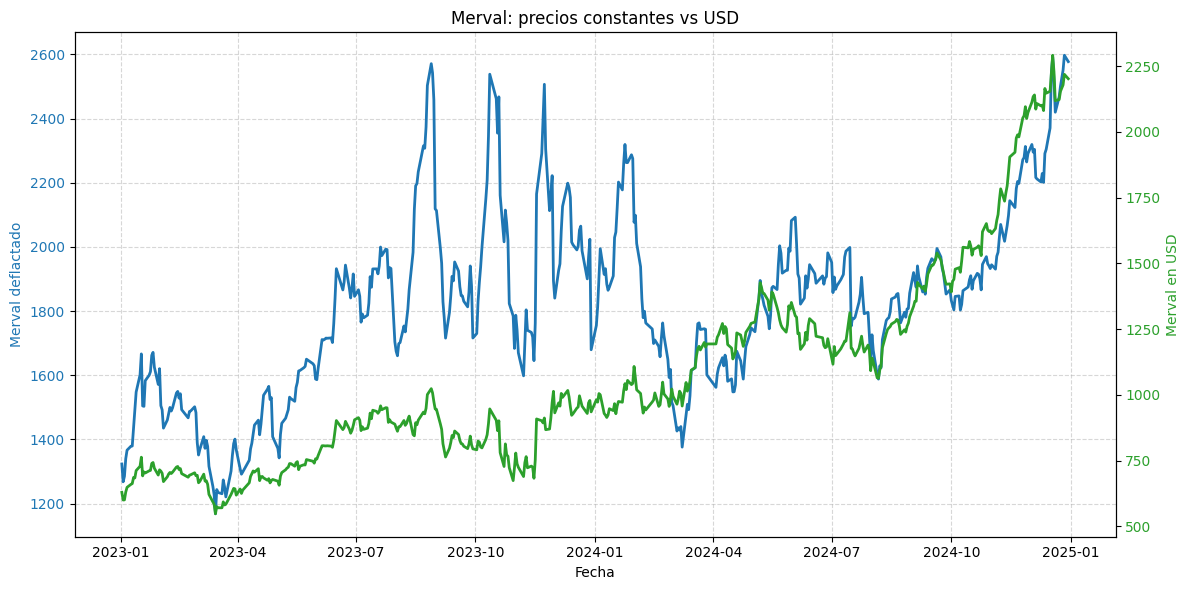

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Primer eje: Merval deflactado
color1 = 'tab:blue'
ax1.plot(tot_2.index, tot_2['merval_def'], color=color1, label='Merval deflactado', linewidth=2)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Merval deflactado', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Segundo eje: Merval en USD
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.plot(tot_2.index, tot_2['merval_usd'], color=color2, label='Merval en USD', linewidth=2, linestyle='-')
ax2.set_ylabel('Merval en USD', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Título y estilo
plt.title('Merval: precios constantes vs USD')
ax1.grid(True, linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()


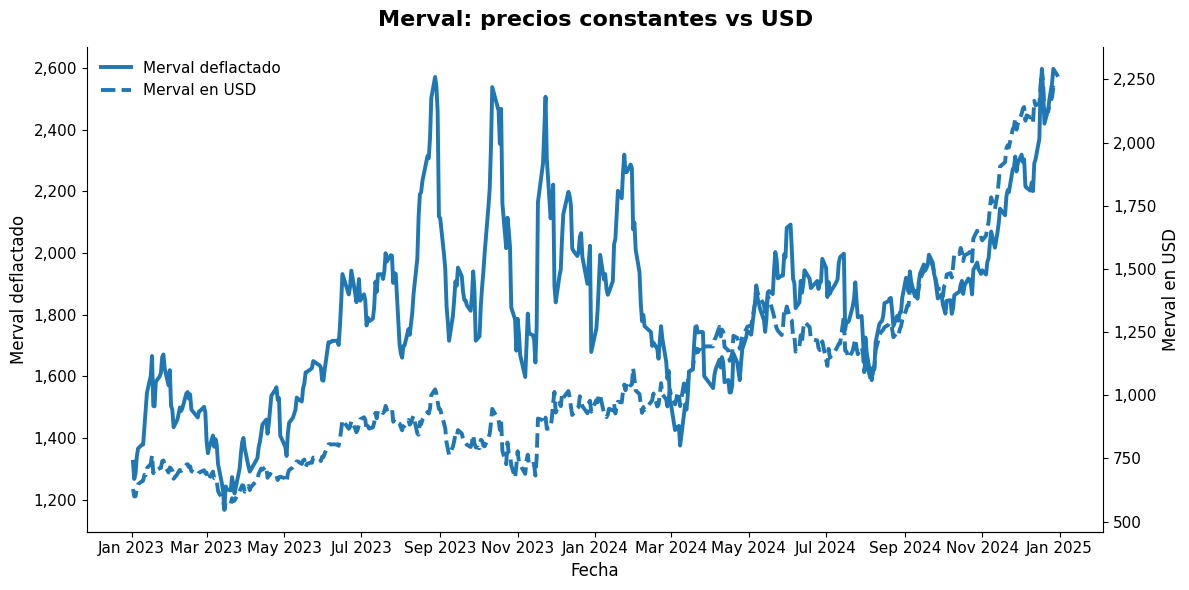

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

fig, ax1 = plt.subplots(figsize=(12, 6))

# =========================
# Eje izquierdo: Merval deflactado
# =========================
ax1.plot(
    tot_2.index,
    tot_2['merval_def'],
    linewidth=2.8,
    label='Merval deflactado'
)

ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Merval deflactado', fontsize=12)

ax1.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x:,.0f}')
)

# =========================
# Eje derecho: Merval en USD
# =========================
ax2 = ax1.twinx()

ax2.plot(
    tot_2.index,
    tot_2['merval_usd'],
    linewidth=2.8,
    linestyle='--',
    label='Merval en USD'
)

ax2.set_ylabel('Merval en USD', fontsize=12)

ax2.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x:,.0f}')
)

# =========================
# Formato eje X (fechas)
# =========================
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right')

# =========================
# Estilo institucional
# =========================
ax1.grid(False)
ax2.grid(False)

# Limpiar spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax1.spines['bottom'].set_linewidth(0.8)
ax2.spines['bottom'].set_linewidth(0.8)

ax1.tick_params(axis='both', labelsize=11)
ax2.tick_params(axis='y', labelsize=11)

# =========================
# Título
# =========================
plt.title(
    'Merval: precios constantes vs USD',
    fontsize=16,
    weight='bold',
    pad=15
)

# =========================
# Leyenda combinada (clean)
# =========================
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    frameon=False,
    fontsize=11,
    loc='upper left'
)

fig.tight_layout()
plt.show()


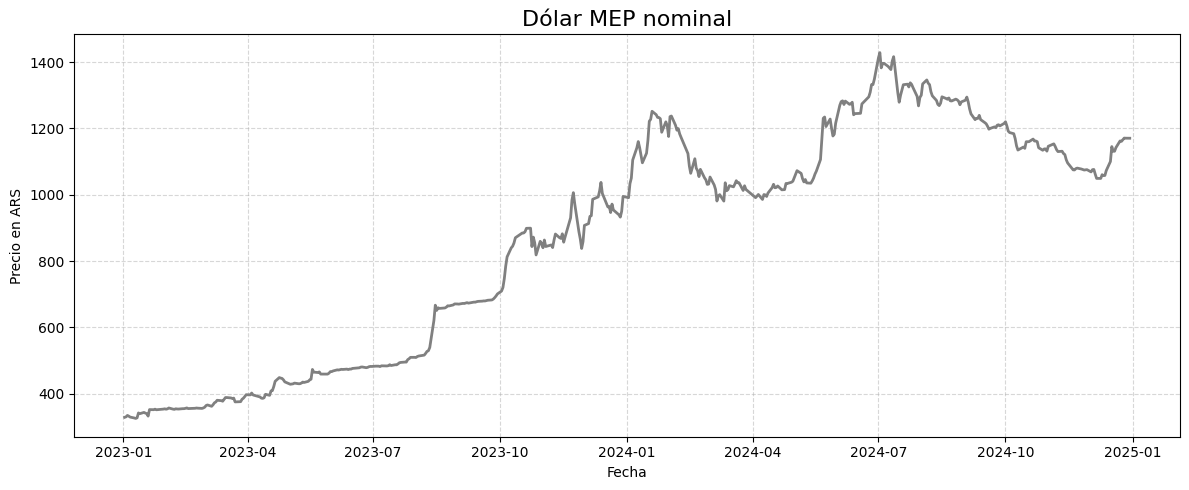

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(tot_2.index, tot_2['ultimo'], color='gray', linewidth=2)

plt.title('Dólar MEP nominal', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio en ARS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

fig = px.line(
    tot_2,
    x=tot_2.index,
    y='merval_def',
    title='Merval deflactado',
    labels={'x': 'Fecha', 'merval_def': 'Merval deflactado'}
)

fig.update_traces(line=dict(color='blue', width=3))
fig.update_layout(
    template='plotly_white',
    hovermode='x unified'
)

fig.show()
